<a href="https://colab.research.google.com/github/Al-3/Hepatitis-Capstone-Project/blob/main/Capstone_Project(Hepatitis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statistics as st
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

null_values=["?",]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data',index_col=False,na_values=null_values,
                  names=["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER_BIG","LIVER_FIRM","SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK_PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"],)



In [ ]:
df.shape

(155, 20)

In [ ]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


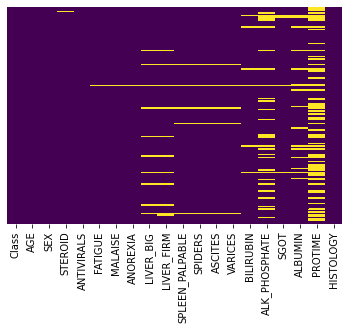

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

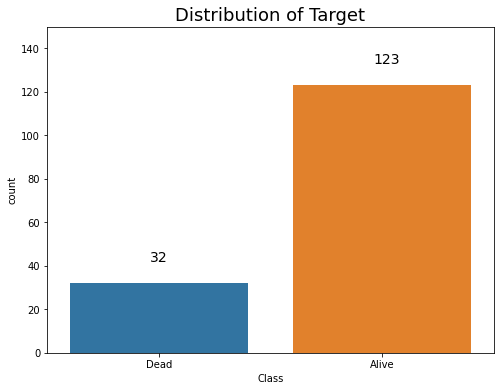

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=df['Class'])
xlabels=['Dead','Alive']
target_count=df.Class.value_counts()
plt.annotate(s=target_count[1], xy=(-0.04,10+target_count[1]), size=14)
plt.annotate(s=target_count[2], xy=(0.96,10+target_count[2]), size=14)
plt.ylim(0,150)
plt.xticks([0,1],xlabels)
plt.show()

([<matplotlib.patches.Wedge at 0x7f0c39c4eb90>,
 [Text(-0.8766320689627016, 0.6644668657398752, 'Alive'),
  Text(0.8766321000686391, -0.6644668247017661, 'Dead')],
 [Text(-0.47816294670692805, 0.36243647222175013, '79.4%'),
  Text(0.4781629636738031, -0.3624364498373269, '20.6%')])

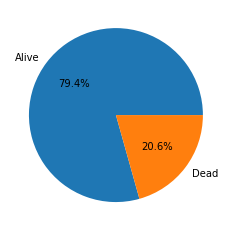

In [ ]:

plt.pie(df['Class'].value_counts(),labels=["Alive","Dead"],autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f0c39c22690>,
 [Text(-1.0426636895453931, 0.3505031105476644, 'Male'),
  Text(1.0426636649330383, -0.3505031837635788, 'Female')],
 [Text(-0.5687256488429416, 0.19118351484418056, '89.7%'),
  Text(0.5687256354180208, -0.19118355478013388, '10.3%')])

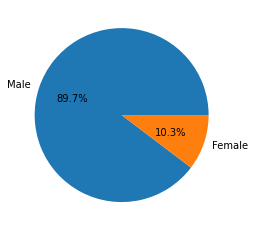

In [ ]:
plt.pie(df['SEX'].value_counts(),labels=["Male","Female"],autopct='%1.1f%%')

In [ ]:
df['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [ ]:
#Ratio of null values
df.isnull().sum()/df.shape[0]*100

Class               0.000000
AGE                 0.000000
SEX                 0.000000
STEROID             0.645161
ANTIVIRALS          0.000000
FATIGUE             0.645161
MALAISE             0.645161
ANOREXIA            0.645161
LIVER_BIG           6.451613
LIVER_FIRM          7.096774
SPLEEN_PALPABLE     3.225806
SPIDERS             3.225806
ASCITES             3.225806
VARICES             3.225806
BILIRUBIN           3.870968
ALK_PHOSPHATE      18.709677
SGOT                2.580645
ALBUMIN            10.322581
PROTIME            43.225806
HISTOLOGY           0.000000
dtype: float64

In [ ]:
df.drop("PROTIME", axis = 1, inplace=True)
df["VARICES"]=df["VARICES"].fillna(st.mode(df["VARICES"]))
df["ASCITES"]=df["ASCITES"].fillna(st.mode(df["ASCITES"]))
df["SPIDERS"]=df["SPIDERS"].fillna(st.mode(df["SPIDERS"]))
df["SPLEEN_PALPABLE"]=df["SPLEEN_PALPABLE"].fillna(st.mode(df["SPLEEN_PALPABLE"]))
df["LIVER_FIRM"]=df["LIVER_FIRM"].fillna(st.mode(df["LIVER_FIRM"]))
df["LIVER_BIG"]=df["LIVER_BIG"].fillna(st.mode(df["LIVER_BIG"]))
df["ANOREXIA"]=df["ANOREXIA"].fillna(st.mode(df["ANOREXIA"]))
df["MALAISE"]=df["MALAISE"].fillna(st.mode(df["MALAISE"]))
df["FATIGUE"]=df["FATIGUE"].fillna(st.mode(df["FATIGUE"]))
df["ANTIVIRALS"]=df["ANTIVIRALS"].fillna(st.mode(df["ANTIVIRALS"]))
df["STEROID"]=df["STEROID"].fillna(st.mode(df["STEROID"]))
#Using mean for these ones
df["BILIRUBIN"]=df["BILIRUBIN"].fillna(round(df["BILIRUBIN"].mean(),2))
df["ALK_PHOSPHATE"]=df["ALK_PHOSPHATE"].fillna(round(df["ALK_PHOSPHATE"].mean(),2))
df["SGOT"]=df["SGOT"].fillna(round(df["SGOT"].mean(),2))
df["ALBUMIN"]=df["ALBUMIN"].fillna(round(df["ALBUMIN"].mean(),2))

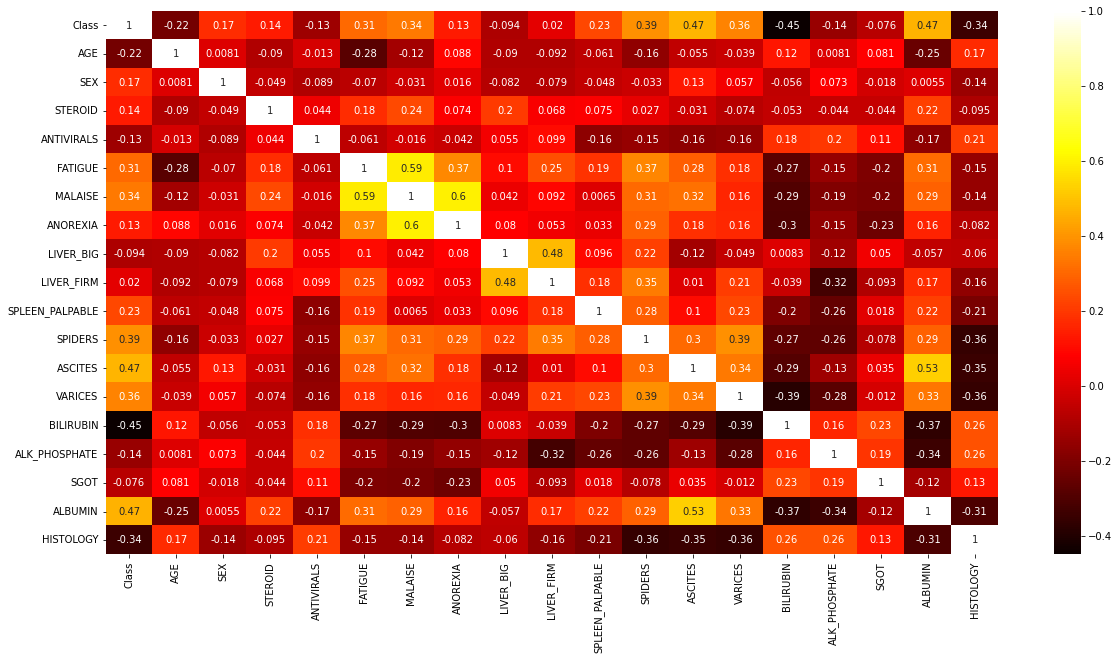

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='hot',annot=True)

In [ ]:
df['AGE_CAT'] = np.where(df.AGE >= 40, 2, 1)


In [ ]:
age = pd.DataFrame({'Class': df['Class'],
                   'AGE_CAT': df['AGE_CAT'],
                    'SEX':df['SEX']
                  })


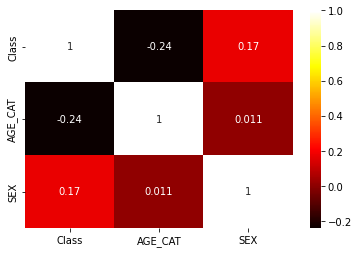

In [ ]:
sns.heatmap(age.corr(),cmap='hot',annot=True)
plt.show()

([<matplotlib.patches.Wedge at 0x7f0c36c44e90>,
 [Text(-0.0557140326349728, 1.098588160580456, 'Old'),
  Text(0.055713929777725414, -1.098588165796775, 'Young')],
 [Text(-0.030389472346348798, 0.5992299057711576, '51.6%'),
  Text(0.030389416242395675, -0.5992299086164228, '48.4%')])

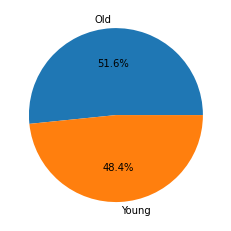

In [ ]:
plt.pie(age['AGE_CAT'].value_counts(),labels=["Old","Young"],autopct='%1.1f%%')

In [ ]:
sym=pd.DataFrame({'Class': df['Class'],
                  'MALAISE':df['MALAISE'],
                  'FATIGUE':df['FATIGUE'],
                  'ANOREXIA':df['ANOREXIA']
                  })


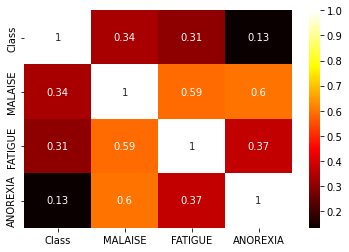

In [ ]:
sns.heatmap(sym.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
meds=pd.DataFrame({'Class': df['Class'],
                  'STEROID':df['STEROID'],
                  'ANTIVIRALS':df['ANTIVIRALS']
                  })


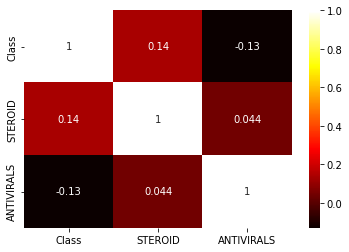

In [ ]:
sns.heatmap(meds.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
phys=pd.DataFrame({'Class': df['Class'],
                  'VARICES':df['VARICES'],
                  'SPIDERS':df['SPIDERS'],
                  'SPLEEN_PALPABLE':df['SPLEEN_PALPABLE'],
                  'LIVER_FIRM':df['LIVER_FIRM'],
                  'LIVER_BIG':df['LIVER_BIG'],
                  'ASCITES':df['ASCITES']
                  })


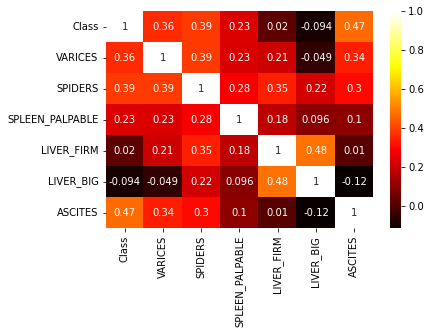

In [ ]:
sns.heatmap(phys.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
report=pd.DataFrame({'Class': df['Class'],
                  'BILIRUBIN':df['BILIRUBIN'],
                  'ALK_PHOSPHATE':df['ALK_PHOSPHATE'],
                  'SGOT':df['SGOT'],
                  'ALBUMIN':df['ALBUMIN']
                  })


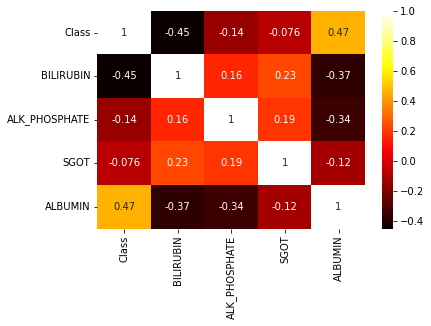

In [ ]:
sns.heatmap(report.corr(),cmap='hot',annot=True)
plt.show()

In [ ]:
df.isnull().sum()/df.shape[0] *100

Class              0.0
AGE                0.0
SEX                0.0
STEROID            0.0
ANTIVIRALS         0.0
FATIGUE            0.0
MALAISE            0.0
ANOREXIA           0.0
LIVER_BIG          0.0
LIVER_FIRM         0.0
SPLEEN_PALPABLE    0.0
SPIDERS            0.0
ASCITES            0.0
VARICES            0.0
BILIRUBIN          0.0
ALK_PHOSPHATE      0.0
SGOT               0.0
ALBUMIN            0.0
HISTOLOGY          0.0
AGE_CAT            0.0
dtype: float64

In [ ]:
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,AGE_CAT
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,1.427613,105.326258,85.893935,3.817548,1.451613,1.483871
std,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,1.188301,46.405585,88.478932,0.616750,0.499266,0.501360
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,1.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,102.000000,59.000000,3.900000,1.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,2.000000,2.000000


In [ ]:
df['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [ ]:
X = df.iloc[:,1:19]
y = df.iloc[:,0]

In [ ]:
X.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.00,18.0,4.0,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.00,42.0,3.5,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.00,32.0,4.0,1
3,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.00,52.0,4.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.33,200.0,4.0,1


In [ ]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


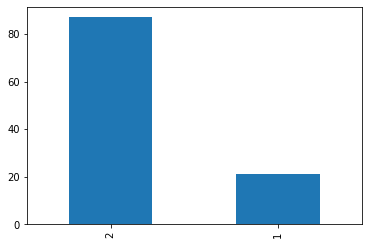

In [ ]:
df_unbalanced = pd.Series(y_train).value_counts().plot.bar()

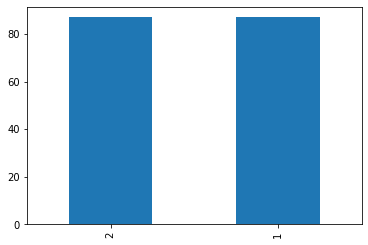

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
df_balanced = pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 45,max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=45)

In [ ]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  7],
       [ 0, 36]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.851063829787234

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.851063829787234

In [ ]:
scoreDF = pd.DataFrame(columns=['accuracy','f1','recall',"roc_auc","type","balance"])

In [ ]:
from sklearn.model_selection import cross_val_score,cross_validate
score = cross_validate(logreg, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"Logistic Regression","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );
print(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy').mean())
accuracy_score(y_test, y_pred)

0.8327272727272726


0.851063829787234

In [ ]:
score = cross_validate(logreg, X_train_new, y_train_new, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"Logistic Regression","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );
print(cross_val_score(logreg, X_train_new, y_train_new, cv=10, scoring='accuracy').mean())

0.8637254901960784


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
score = cross_validate(knn, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"KNN","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, )
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean())

0.6654545454545455


In [ ]:
knn.fit(X_train_new,y_train_new)
knnpred = knn.predict(X_test)
score = cross_validate(knn, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"KNN","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns = scoreDF.columns), ignore_index=True, )
print(cross_val_score(knn, X_train_new, y_train_new, cv=10, scoring='accuracy').mean())

0.7477124183006535


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
score = cross_validate(svc, X_train, y_train, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns = scoreDF.columns), ignore_index=True, )
print(cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy').mean())

0.8527272727272728


In [ ]:
svc.fit(X_train_new, y_train_new)
svcpred = svc.predict(X_test)
score = cross_validate(svc, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns = scoreDF.columns), ignore_index=True, )
print(cross_val_score(svc, X_train_new, y_train_new, cv=10, scoring='accuracy').mean())

0.8748366013071894


In [ ]:
scoreDF

,accuracy,f1,recall,roc_auc,type,balance
0,0.832727,0.476667,0.516667,0.848611,Logistic Regression,No
1,0.863725,0.870373,0.900000,0.904012,Logistic Regression,Yes
2,0.665455,0.116667,0.133333,0.462500,KNN,No
3,0.747712,0.773650,0.863889,0.748611,KNN,Yes
4,0.852727,0.550476,0.566667,0.863889,SVC,No
5,0.874837,0.882280,0.922222,0.905864,SVC,Yes


In [ ]:
sns.pairplot(df, x_vars=["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER_BIG","LIVER_FIRM","SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK_PHOSPHATE","SGOT","ALBUMIN"], y_vars=["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER_BIG","LIVER_FIRM","SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK_PHOSPHATE","SGOT","ALBUMIN"], size=7, aspect=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
scoreDF2 = pd.DataFrame(columns=['accuracy','f1','recall',"roc_auc","type","balance"])

In [ ]:
Class = age.iloc[:,0]
age = age.iloc[:,1:]
Class_train, Class_test, age_train, age_test = train_test_split(Class, age, test_size = 0.3, random_state = 0)

In [ ]:
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
score = cross_validate(svc, X_train, y_train, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns = scoreDF.columns), ignore_index=True, )
print(cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy').mean())

0.8527272727272728
